In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from collections import Counter

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import common.data as data
import common.nn as nn


In [3]:
paths = data.get_dataset_paths("../data")
dataset = data.Marconi100Dataset(paths, data.Scaling.STANDARD)

Loading: 100%|██████████| 249/249 [01:10<00:00,  3.53it/s]


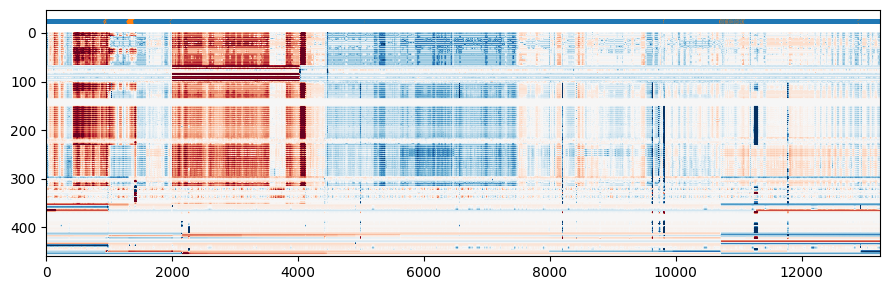

In [6]:
hpcsv, labels = dataset[1]

nn.plot_dataframe(hpcsv, pd.Series(labels.values))
nn.plt.show()

In [8]:
lengths = []
for i in range(len(dataset)):
    df, labels = dataset[i]
    lengths.append(len(labels))

num_time_steps = sum(lengths)
min_len = min(lengths)
max_len = max(lengths)
mean_len = np.mean(lengths)
median_len = np.median(lengths)

counter_len = Counter(lengths)
num_samples = len(lengths)

print(f"Num samples: {num_samples}")
print(f"Num time steps: {num_time_steps}")
print()
print(f"min: {min_len}")
print(f"max: {max_len}")
print(f"mean: {mean_len:.1f}")
print(f"median: {median_len}")
ax = sns.histplot(lengths, bins=50) # type: ignore
ax.set_xlabel("Sample length")

lim = 1024
lt = sum(counter_len[i] for i in range(lim))
lt_p = lt / num_samples * 100
gt = num_samples - lt
gt_p = 100 - lt_p

ax.axvline(lim)
print()
print(f"  < {lim}: {lt:6d} ({lt_p:.1f}%)")
print(f" >= {lim}: {gt:6d} ({gt_p:.1f}%)")
        


Num samples: 241
Num time steps: 3270454

min: 1980
max: 20511
mean: 13570.3
median: 13393.0

  < 1024:      0 (0.0%)
 >= 1024:    241 (100.0%)


In [14]:
sequences = []
for i in range(len(dataset)):
    df, labels = dataset[i]

    count = 0
    counting = False
    for l in labels:
        if l == 0:
            if counting:
                sequences.append(count)
                count = 0
                counting = False
        else:
            counting = True
            count += 1

num_anomal_ts = sum(sequences)
min_seq = min(sequences)
max_seq = max(sequences)
mean_seq = np.mean(sequences)
median_seq = np.median(sequences)

counter_seq = Counter(sequences)
num_anomalies = len(sequences)

lim = 4
lt = sum(counter_seq[i] for i in range(lim))
lt_p = lt / num_anomalies
gt = num_anomalies - lt
gt_p = 1 - lt_p
gg = sum(counter_seq[i] for i in range(10, max_seq+1))
gg_p = gg / num_anomalies
anomaly_ratio = num_anomal_ts / num_time_steps

ax = sns.histplot(sequences, bins=50, log_scale=True) # type: ignore
ax.set_xlabel("Anomaly length")
ax.axvline(lim)

print(f"Num anomalies: {num_anomalies}")
print(f"Num anomalous time steps: {num_anomal_ts}")
print(f"Anomaly ratio: {anomaly_ratio:.2%}")
print()
print(f"min: {min_seq}")
print(f"max: {max_seq}")
print(f"mean: {mean_seq:.1f}")
print(f"median: {median_seq}")
print()
print(f"  < {lim}: {lt:6d} ({lt_p:.1%})")
print(f" >= {lim}: {gt:6d} ({gt_p:.1%})")
print(f">= 10: {gg:6d} ({gg_p:.1%})")


Num anomalies: 26037
Num anomalous time steps: 124755
Anomaly ratio: 3.81%

min: 1
max: 5293
mean: 4.8
median: 1.0

  < 4:  24037 (92.3%)
 >= 4:   2000 (7.7%)
>= 10:    435 (1.7%)
